In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import math
import seaborn as sns
import matplotlib
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("weatherAUS.csv")

# Preprocessing and Exploratory Data Analysis



In [3]:
#It is given in dataset, to drop Risk MM
df.drop(columns=['RISK_MM'],axis=1,inplace=True)

In [4]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
#statistical properties
df.describe

<bound method NDFrame.describe of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN          

In [6]:
#Explore target variable, 'RainTomorrow
#Check missing values
df['RainTomorrow'].isna().sum()


0

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64


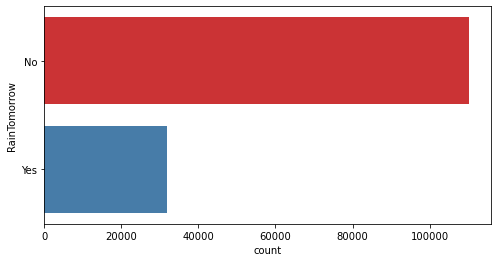

In [7]:
#Check frequency distribution of values in RainTomorrow

print(df['RainTomorrow'].value_counts()/len(df))

f, ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(y="RainTomorrow", data=df, palette="Set1")
plt.show()

In [8]:
#Check missing values in entire dataframe, needs imputation
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [9]:
#check cardinality of categorical variables
cat = [col for col in df.columns if df[col].dtype=='O']
for col in cat: 
    
    print(col, ' contains ', len(df[col].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


In [10]:
#date has high cardinality, so we will split in to d/m/y
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date',axis=1,inplace=True)

In [11]:
#preview dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [12]:
#check for outliers
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  \
count  88536.000000  85099.000000  141289.000000  139467.000000   
mean       4.437189      4.503167      16.987509      21.687235   
std        2.887016      2.720633       6.492838       6.937594   
min        0.000000      0.000000      -7.200000      -5.400000   
25%        1.000000      2.000000      12.300000      16.600000   
50%        5.000000      5.000000      16.700000      21.100000   
75%        7.000000      7.000000      21.600000      26.400000   
max        9.000000      9.000000      40.200000      46.700000   

                Year          Month            Day  
count  142193.000000  142193.000000  142193.000000  
mean     2012.758926       6.402544      15.715084  
std         2.541256       3.426506       8.798150  
min      2007.000000       1.000000       1.000000  
25%      2011.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

Text(0, 0.5, 'WindSpeed3pm')

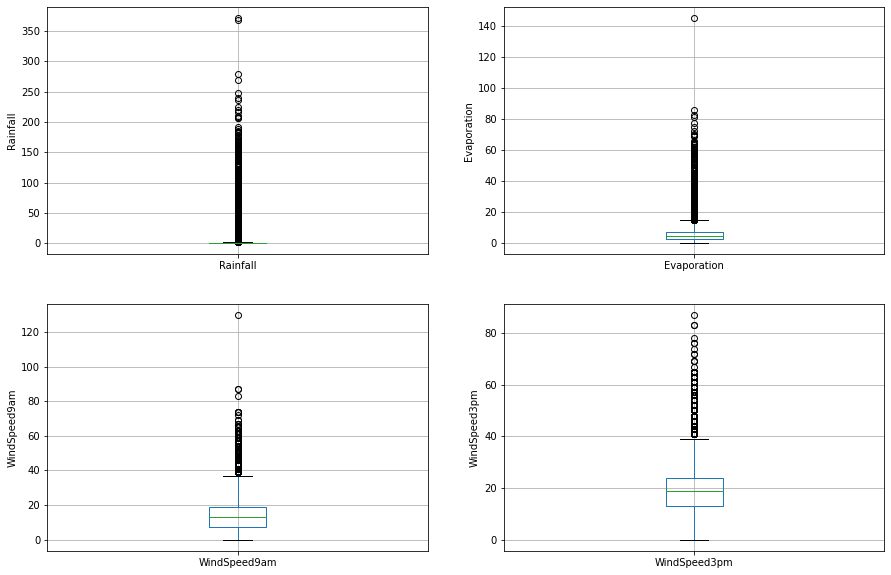

In [13]:
#Rainfall, Evaporation , WindSpeed9am, WindSpeed3pm have clear outliers
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

In [14]:
# we will use IQR to find outliers
#find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

#find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

#find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

#find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


# Multivariate Analysis

In [15]:
df['RainToday'] = pd.get_dummies(df['RainToday'],drop_first=True)
df['RainTomorrow'] = pd.get_dummies(df['RainTomorrow'],drop_first=True)

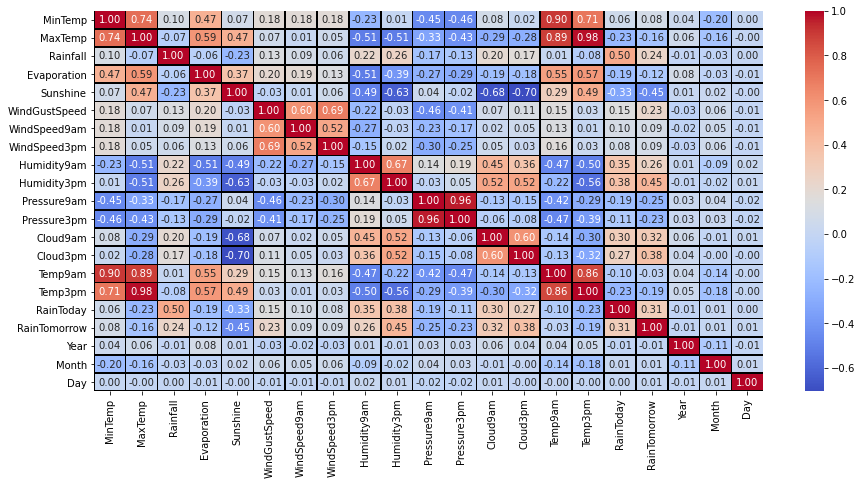

In [16]:
#correlation heatmap
f,ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

# Feature Engineering


In [17]:
# declare features and target
# train_test_split
df_y = df['RainTomorrow']
df_X = df.drop(columns='RainTomorrow',axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.2,random_state=42)

In [45]:
X_train.shape

(113754, 118)

In [18]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          uint8
Year               int64
Month              int64
Day                int64
dtype: object

In [19]:
#seperate into categorical features
cat = [col for col in X_train.columns if X_train[col].dtypes == 'object']
cat

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [20]:
#and numerical features
num = [col for col in X_train.columns if X_train[col].dtypes != 'object']
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Year',
 'Month',
 'Day']

In [21]:
#impute missing values with median for numerical data
for df1 in [X_train,X_test]:
    for col in num:
        df1[col].fillna(X_train[col].median(), inplace=True)

In [22]:
#impute missing values with mode for categorical data
for df2 in [X_train,X_test]:
    for col in cat:
        df2[col].fillna(X_train[col].mode()[0], inplace=True)

In [23]:
#check missing values again
X_train.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [24]:
X_test.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [25]:
#using outlier boundaries from earlier, we will cap maximum values of Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm

def max_boundary(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_boundary(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_boundary(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_boundary(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_boundary(df3, 'WindSpeed3pm', 57)

In [26]:
#we can now see they have been capped
X_train.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       12.175225      23.221349       0.677010       5.143557   
std         6.384019       7.109859       1.185327       2.814837   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.600000      17.900000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.400000   
max        33.900000      48.100000       3.200000      21.800000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        7.993989      39.895063      13.980124      18.629719   
std         2.758049      13.127684       8.815668       8.691237   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.400000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       68.839434      51.480317    1017.646309    1015.252305   
std        18.944168      20.531492       6.750345       6.683925   
min         0.000000       0.000000     980.500000     978.200000   
25%        57.000000      37.000000    1013.500000    1011.000000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      65.000000    1021.800000    1019.400000   
max       100.000000     100.000000    1041.000000    1038.900000   

            Cloud9am       Cloud3pm        Temp9am       Temp3pm  \
count  113754.000000  113754.000000  113754.000000  113754.00000   
mean        4.647652       4.701452      16.981340      21.67070   
std         2.292660       2.118964       6.470597       6.87257   
min         0.000000       0.000000      -7.200000      -5.40000   
25%         3.000000       4.000000      12.300000      16.70000   
50%         5.000000       5.000000      16.700000      21.10000   
75%         6.000000       6.000000      21.500000      26.30000   
max         8.000000       9.000000      40.200000      46.70000   

           RainToday           Year          Month            Day  
count  113754.000000  113754.000000  113754.000000  113754.000000  
mean        0.221891    2012.757802       6.400891      15.707826  
std         0.415520       2.541504       3.423346       8.797404  
min         0.000000    2007.000000       1.000000       1.000000  
25%         0.000000    2011.000000       3.000000       8.000000  
50%         0.000000    2013.000000       6.000000      16.000000  
75%         0.000000    2015.000000       9.000000      23.000000  
max         1.000000    2017.000000      12.000000      31.000000

In [27]:
X_train

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
17969     NorahHead     15.1     23.9       0.0          4.8       8.4   
124769      Walpole      9.7     14.2       3.2          4.8       8.4   
39287   Williamtown     13.2     25.4       0.0          3.2       8.8   
127749       Hobart      7.6     14.8       0.0          4.0       7.0   
40651   Williamtown     12.9     22.2       0.0          4.0       7.9   
...             ...      ...      ...       ...          ...       ...   
110268  Witchcliffe      9.0     18.9       3.2          4.8       8.4   
119879        Perth     13.1     19.9       3.0          1.2       2.3   
103694      Woomera     10.8     25.5       0.0         12.0      13.0   
131932   Launceston     11.3     21.4       0.0          4.8       8.4   
121958   SalmonGums     10.3     28.1       0.0          4.8       8.4   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure9am  \
17969          SSW           67.0         NW          W  ...       1001.9   
124769         WSW           50.0        WNW          W  ...       1008.2   
39287          ENE           30.0          W          E  ...       1025.2   
127749         WNW           94.0        WNW        WNW  ...       1004.6   
40651            S           37.0         SW        SSE  ...       1023.0   
...            ...            ...        ...        ...  ...          ...   
110268           W           43.0        WNW          W  ...       1017.5   
119879          SW           39.0         SW          W  ...       1018.1   
103694         SSW           44.0        SSW        SSE  ...       1015.7   
131932         ESE           39.0        SSE         SE  ...       1017.6   
121958         SSE           46.0         NE        ESE  ...       1017.6   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  \
17969        1002.4       5.0       5.0     19.8     14.3          0  2009   
124769       1007.7       5.0       5.0     11.1     13.4          1  2011   
39287        1021.5       6.0       5.0     21.2     24.0          0  2010   
127749       1001.4       5.0       5.0     11.1     12.9          0  2011   
40651        1021.2       6.0       2.0     18.8     20.6          0  2015   
...             ...       ...       ...      ...      ...        ...   ...   
110268       1017.7       5.0       5.0     15.8     17.6          1  2012   
119879       1018.2       7.0       7.0     15.4     19.1          1  2014   
103694       1012.6       0.0       0.0     15.3     23.1          0  2010   
131932       1015.2       8.0       4.0     15.8     15.7          0  2014   
121958       1015.2       5.0       5.0     19.7     26.7          0  2012   

        Month  Day  
17969      10   14  
124769      9   26  
39287       4   20  
127749      7   12  
40651       4   13  
...       ...  ...  
110268      9    1  
119879      9    9  
103694     12   20  
131932     11    5  
121958      2    7  

[113754 rows x 24 columns]

In [28]:
# Encode categorical features using One-Hot
    
X_train = pd.concat([X_train[num], 
pd.get_dummies(X_train['RainToday'],drop_first=True),
pd.get_dummies(X_train["Location"]),
pd.get_dummies(X_train["WindGustDir"],prefix='WindGustDir'),
pd.get_dummies(X_train["WindDir9am"],prefix='WindDir9am'),
pd.get_dummies(X_train["WindDir3pm"],prefix='WindDir3pm')], axis=1)

In [29]:
#same for x_test
    
X_test = pd.concat([X_test[num], 
pd.get_dummies(X_test['RainToday'],drop_first=True),
pd.get_dummies(X_test["Location"]),
pd.get_dummies(X_test["WindGustDir"],prefix='WindGustDir'),
pd.get_dummies(X_test["WindDir9am"],prefix='WindDir9am'),
pd.get_dummies(X_test["WindDir3pm"],prefix='WindDir3pm')], axis=1)

In [30]:
#all numerical data
X_train.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113754 entries, 17969 to 121958
Columns: 118 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(16), int64(3), uint8(99)
memory usage: 28.1 MB


In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28439 entries, 56320 to 42917
Columns: 118 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(16), int64(3), uint8(99)
memory usage: 7.0 MB


In [32]:
#feature scaling - standardisation using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
cols = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=[cols])
X_test = pd.DataFrame(scaler.transform(X_test),columns=[cols])


In [33]:
X_train

MinTemp   MaxTemp  Rainfall Evaporation  Sunshine WindGustSpeed  \
0       0.458142  0.095453 -0.571161   -0.122053  0.147210      2.064725   
1      -0.387724 -1.268856  2.128528   -0.122053  0.147210      0.769746   
2       0.160523  0.306428 -0.571161   -0.690472  0.292241     -0.753759   
3      -0.716672 -1.184466 -0.571161   -0.406262 -0.360397      4.121456   
4       0.113530 -0.143653 -0.571161   -0.406262 -0.034078     -0.220532   
...          ...       ...       ...         ...       ...           ...   
113749 -0.497373 -0.607799  2.128528   -0.122053  0.147210      0.236519   
113750  0.144859 -0.467149  1.959797   -1.400996 -2.064508     -0.068182   
113751 -0.215418  0.320493 -0.571161    2.435833  1.815063      0.312695   
113752 -0.137097 -0.256173 -0.571161   -0.122053  0.147210     -0.068182   
113753 -0.293739  0.686184 -0.571161   -0.122053  0.147210      0.465045   

       WindSpeed9am WindSpeed3pm Humidity9am Humidity3pm  ... WindDir3pm_NNW  \
0          0.569429     0.387781   -1.627919    0.804606  ...      -0.239644   
1          0.115690     1.078135    1.169788    0.220135  ...      -0.239644   
2         -0.905225    -0.187514    0.536345    0.561076  ...      -0.239644   
3          1.817213     1.883547   -0.888902   -0.315630  ...      -0.239644   
4          0.115690     0.157663    0.008476    0.025312  ...      -0.239644   
...             ...          ...         ...         ...  ...            ...   
113749     0.682864    -0.417632    0.061263    0.025312  ...      -0.239644   
113750    -1.358964    -0.647749    1.117001    0.171429  ...      -0.239644   
113751     1.363473    -0.417632   -1.469558   -1.484571  ...      -0.239644   
113752     0.569429     0.387781    0.325197    1.340370  ...      -0.239644   
113753     0.115690    -0.647749   -0.941689   -1.143630  ...      -0.239644   

       WindDir3pm_NW WindDir3pm_S WindDir3pm_SE WindDir3pm_SSE WindDir3pm_SSW  \
0          -0.251971    -0.269189     -0.335520      -0.263912       -0.24479   
1          -0.251971    -0.269189     -0.335520      -0.263912       -0.24479   
2          -0.251971    -0.269189     -0.335520      -0.263912       -0.24479   
3          -0.251971    -0.269189     -0.335520      -0.263912       -0.24479   
4          -0.251971    -0.269189     -0.335520       3.789147       -0.24479   
...              ...          ...           ...            ...            ...   
113749     -0.251971    -0.269189     -0.335520      -0.263912       -0.24479   
113750     -0.251971    -0.269189     -0.335520      -0.263912       -0.24479   
113751     -0.251971    -0.269189     -0.335520       3.789147       -0.24479   
113752     -0.251971    -0.269189      2.980446      -0.263912       -0.24479   
113753     -0.251971    -0.269189     -0.335520      -0.263912       -0.24479   

       WindDir3pm_SW WindDir3pm_W WindDir3pm_WNW WindDir3pm_WSW  
0          -0.262537     3.657265      -0.254349      -0.265167  
1          -0.262537     3.657265      -0.254349      -0.265167  
2          -0.262537    -0.273428      -0.254349      -0.265167  
3          -0.262537    -0.273428       3.931598      -0.265167  
4          -0.262537    -0.273428      -0.254349      -0.265167  
...              ...          ...            ...            ...  
113749     -0.262537     3.657265      -0.254349      -0.265167  
113750     -0.262537     3.657265      -0.254349      -0.265167  
113751     -0.262537    -0.273428      -0.254349      -0.265167  
113752     -0.262537    -0.273428      -0.254349      -0.265167  
113753     -0.262537    -0.273428      -0.254349      -0.265167  

[113754 rows x 118 columns]

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)


LogisticRegression()

In [35]:
y_pred_test = logmodel.predict(X_test)
y_pred_test

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [67]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time

t0=time.time()
# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)
y_prob = logmodel.predict_proba(X_test)[:, 1]



print("LOGISTIC REGRESSION")
model_log_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(model_log_accuracy))
model_log_training = logmodel.score(X_train, y_train)
print('Training set score: {:.4f}'.format(model_log_training))
model_log_test = logmodel.score(X_test, y_test)
print('Test set score: {:.4f}'.format(model_log_test))
model_log_time = time.time()-t0
print('Time Taken: {:.4f}' .format(model_log_time))
print(classification_report(y_test, y_pred))

LOGISTIC REGRESSION
Model accuracy score: 0.8456
Training set score: 0.8488
Test set score: 0.8456
Time Taken: 0.8784
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22098
           1       0.71      0.51      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.79      0.73      0.75     28439
weighted avg       0.84      0.85      0.84     28439



True Positives=  20804
True Negatives=  3243
False Positives=  1294
False Negatives=  3098


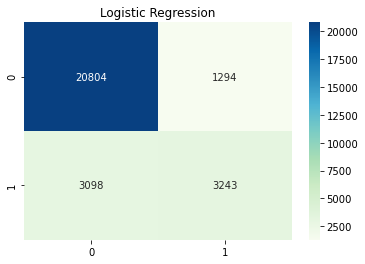

In [37]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

confMatrix = confusion_matrix(y_test, y_pred)
plt.title('Logistic Regression')
sns.heatmap(confMatrix, annot=True, fmt="d",cmap='GnBu')

print('True Positives= ',cm[0,0])
print('True Negatives= ',cm[1,1])
print('False Positives= ',cm[0,1])
print('False Negatives= ',cm[1,0])

ROC AUC : 0.8665


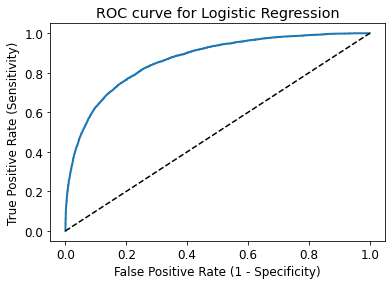

In [56]:
# ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. 
# It is a technique to compare classifier performance. In this technique, 
# we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, 
# whereas a purely random classifier will have a ROC AUC equal to 0.5.
# So, ROC AUC is the percentage of the ROC plot that is underneath the curve.
from sklearn.metrics import roc_auc_score
ROC_AUC_log = roc_auc_score(y_test, y_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC_log))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label = 1)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Support Vector Machine



In [69]:
# Import module for fitting
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import time
t0 = time.time()
# Create instance (i.e. object) of LogisticRegression
svmmodel = LinearSVC()
# Fit the model using the training data
svmmodel.fit(X_train, y_train)
#Predicting the target for test data
y_pred = svmmodel.predict(X_test)

print("SUPPORT VECTOR MACHINES")
model_SVM_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(model_SVM_accuracy))
model_SVM_training = svmmodel.score(X_train, y_train)
print('Training set score: {:.4f}'.format(model_SVM_training))
model_SVM_test = svmmodel.score(X_test, y_test)
print('Test set score: {:.4f}'.format(model_SVM_test))
model_SVM_time = time.time()-t0
print('Time Taken: {:.4f}' .format(model_SVM_time))
print(classification_report(y_test,y_pred))

SUPPORT VECTOR MACHINES
Model accuracy score: 0.8459
Training set score: 0.8484
Test set score: 0.8459
Time Taken: 70.7201
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.73      0.49      0.59      6341

    accuracy                           0.85     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.84      0.85      0.83     28439



True Positives=  18965
True Negatives=  3434
False Positives=  3133
False Negatives=  2907


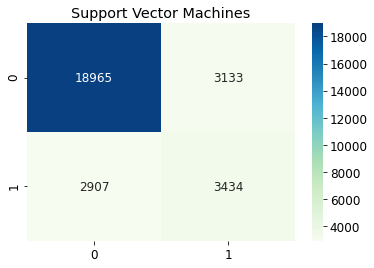

In [73]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('True Positives= ',cm[0,0])
print('True Negatives= ',cm[1,1])
print('False Positives= ',cm[0,1])
print('False Negatives= ',cm[1,0])

confMatrix = confusion_matrix(y_test, y_pred)
plt.title('Support Vector Machines')
sns.heatmap(confMatrix, annot=True, fmt="d",cmap='GnBu')

ROC AUC : 0.8664


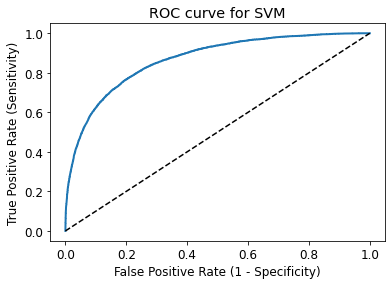

In [66]:
#ROC_AUC
from sklearn.metrics import roc_auc_score

from sklearn.calibration import CalibratedClassifierCV
clf = CalibratedClassifierCV(svmmodel) 
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]
ROC_AUC_svm = roc_auc_score(y_test, y_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC_svm))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Decision Tree

In [71]:

from sklearn.tree import DecisionTreeClassifier
import time
t0=time.time()

dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(X_train, y_train)

y_pred= dtreemodel.predict(X_test)


from sklearn.metrics import accuracy_score
print("DECISION TREE")
model_DT_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(model_DT_accuracy))
model_DT_training = dtreemodel.score(X_train, y_train)
print('Training set score: {:.4f}'.format(model_DT_training))
model_DT_test = dtreemodel.score(X_test, y_test)
print('Test set score: {:.4f}'.format(model_DT_test))
model_DT_time = time.time()-t0
print('Time Taken: {:.4f}' .format(model_DT_time))

print(classification_report(y_test,y_pred))

DECISION TREE
Model accuracy score: 0.7876
Training set score: 1.0000
Test set score: 0.7876
Time Taken: 4.0473
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     22098
           1       0.52      0.54      0.53      6341

    accuracy                           0.79     28439
   macro avg       0.70      0.70      0.70     28439
weighted avg       0.79      0.79      0.79     28439



True Positives=  18965
True Negatives=  3434
False Positives=  3133
False Negatives=  2907


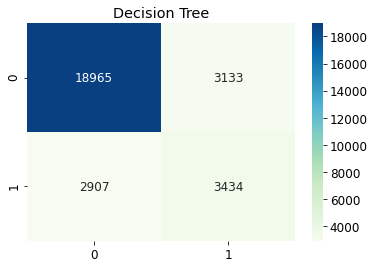

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print('True Positives= ',cm[0,0])
print('True Negatives= ',cm[1,1])
print('False Positives= ',cm[0,1])
print('False Negatives= ',cm[1,0])

confMatrix = confusion_matrix(y_test, y_pred)
plt.title('Decision Tree')
sns.heatmap(confMatrix, annot=True, fmt="d",cmap='GnBu')

ROC AUC : 0.6999


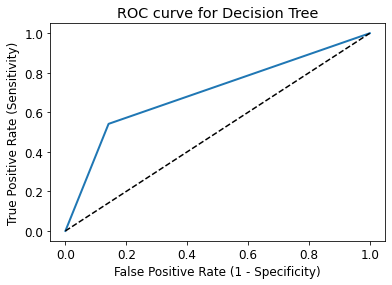

In [75]:
from sklearn.metrics import roc_auc_score
y_prob = dtreemodel.predict_proba(X_test)[:, 1]
ROC_AUC_dt = roc_auc_score(y_test, y_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC_dt))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision Tree')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
import time
t0=time.time()
rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print("RANDOM FOREST")
model_rf_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(model_rf_accuracy))
model_rf_training = rfc.score(X_train, y_train)
print('Training set score: {:.4f}'.format(model_rf_training))
model_rf_test = rfc.score(X_test, y_test)
print('Test set score: {:.4f}'.format(model_rf_test))
model_rf_time = time.time()-t0
print('Time Taken: {:.4f}' .format(model_rf_time))
print(classification_report(y_test,y_pred))

RANDOM FOREST
Model accuracy score: 0.8186
Training set score: 0.8197
Test set score: 0.8186
Time Taken: 11.5147
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     22098
           1       0.82      0.24      0.37      6341

    accuracy                           0.82     28439
   macro avg       0.82      0.61      0.63     28439
weighted avg       0.82      0.82      0.78     28439



True Positives=  21758
True Negatives=  1522
False Positives=  340
False Negatives=  4819


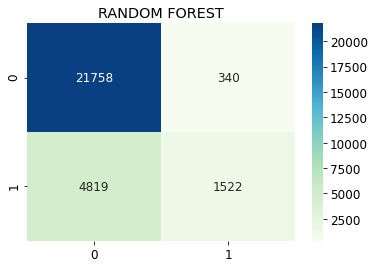

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print('True Positives= ',cm[0,0])
print('True Negatives= ',cm[1,1])
print('False Positives= ',cm[0,1])
print('False Negatives= ',cm[1,0])

confMatrix = confusion_matrix(y_test, y_pred)
plt.title('RANDOM FOREST')
sns.heatmap(confMatrix, annot=True, fmt="d",cmap='GnBu')

ROC AUC : 0.8317


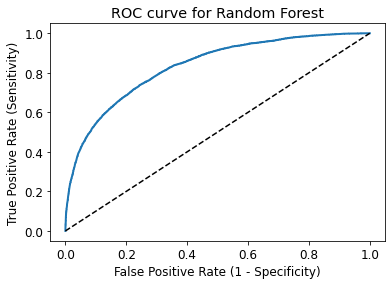

In [86]:
from sklearn.metrics import roc_auc_score
y_prob = rfc.predict_proba(X_test)[:, 1]
ROC_AUC_rfc = roc_auc_score(y_test, y_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC_rfc))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# XGBoost


In [82]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
import time
t0=time.time()

XGB = GradientBoostingClassifier(random_state=0)
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

from sklearn.metrics import accuracy_score
print("XGBOOST")
model_xgb_accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(model_xgb_accuracy))
model_xgb_training = XGB.score(X_train, y_train)
print('Training set score: {:.4f}'.format(model_xgb_training))
model_xgb_test = XGB.score(X_test, y_test)
print('Test set score: {:.4f}'.format(model_xgb_test))
model_xgb_time = time.time()-t0
print('Time Taken: {:.4f}' .format(model_xgb_time))
print(classification_report(y_test,y_pred))


XGBOOST
Model accuracy score: 0.8473
Training set score: 0.8522
Test set score: 0.8473
Time Taken: 44.1411
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.73      0.50      0.59      6341

    accuracy                           0.85     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439



True Positives=  20946
True Negatives=  3149
False Positives=  1152
False Negatives=  3192


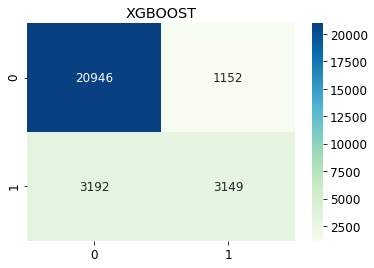

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('True Positives= ',cm[0,0])
print('True Negatives= ',cm[1,1])
print('False Positives= ',cm[0,1])
print('False Negatives= ',cm[1,0])

confMatrix = confusion_matrix(y_test, y_pred)
plt.title('XGBOOST')
sns.heatmap(confMatrix, annot=True, fmt="d",cmap='GnBu')

ROC AUC : 0.8317


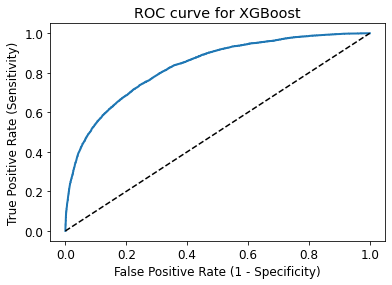

In [85]:
from sklearn.metrics import roc_auc_score
y_prob = rfc.predict_proba(X_test)[:, 1]
ROC_AUC_xgb = roc_auc_score(y_test, y_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC_xgb))

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for XGBoost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [88]:
#Accuracy comparison of the models
accuracy_scores = [model_log_accuracy,model_SVM_accuracy,model_DT_accuracy,model_rf_accuracy,model_xgb_accuracy]
training_scores = [model_log_training,model_SVM_training,model_DT_training,model_rf_training,model_xgb_training]
testing_scores = [model_log_test,model_SVM_test,model_DT_test,model_rf_test,model_xgb_test]
time_taken = [model_log_time,model_SVM_time,model_DT_time,model_rf_time,model_xgb_time]
ROC_AUC_scores = [ROC_AUC_log,ROC_AUC_svm,ROC_AUC_dt,ROC_AUC_rfc,ROC_AUC_xgb]

model_data = {'Model': ['Logistic Regression','Support Vector Machines','Decision Tree','Random Forest','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC_score': ROC_AUC_scores,
              'Training_Score': training_scores,
              'Testing_Score': testing_scores,
              'Time_Taken': time_taken}
data = pd.DataFrame(model_data)

data

Model  Accuracy  ROC_AUC_score  Training_Score  \
0      Logistic Regression  0.845564       0.866473        0.848797   
1  Support Vector Machines  0.845881       0.866360        0.848427   
2            Decision Tree  0.787616       0.699889        1.000000   
3            Random Forest  0.818594       0.831652        0.819672   
4                  XGBoost  0.847252       0.831652        0.852243   

   Testing_Score  Time_Taken  
0       0.845564    0.878433  
1       0.845881   70.720108  
2       0.787616    4.047289  
3       0.818594   11.514662  
4       0.847252   44.141072

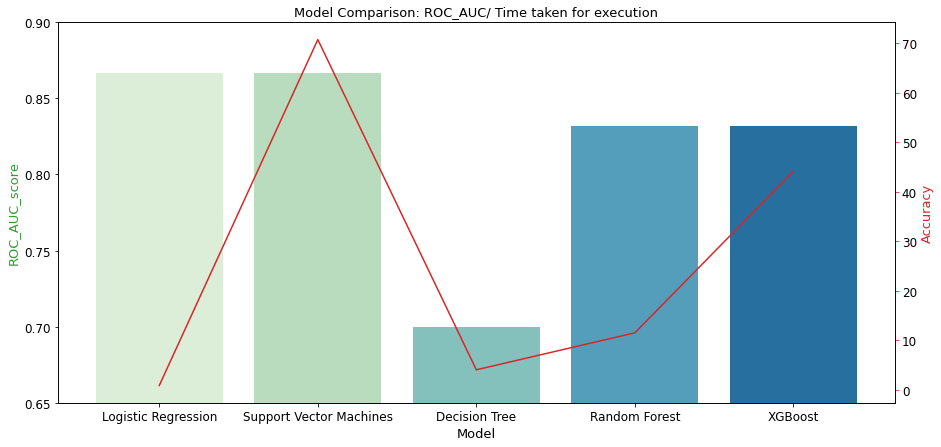

In [91]:

fig, ax1 = plt.subplots(figsize=(15,7))
ax1.set_title('Model Comparison: ROC_AUC/ Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2= sns.barplot(x='Model', y='ROC_AUC_score', data = data, palette='GnBu')
ax1.set(ylim=(0.65,0.9))
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Time_Taken', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)